<a href="https://colab.research.google.com/github/IngridSchieven/DA_AssignmentPandas250422Ingrid/blob/main/Shark_Attack_assignment_Ingrid_170522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

In [ ]:
#read in the CVS file attacks.csv
#many thanks to Stefanie for sharing her Github repository

url = 'https://raw.githubusercontent.com/stefaniemichielsen/Winc/main/attacks.csv'
df = pd.read_csv(url, encoding='cp1252')

df.head(10) #quick scan of df

In [ ]:
# Explore the dataset!

#df.shape         #25723 rows, 24 columns
#df.size          #617352 cells
#df.columns       #NB: some weird columnnames appear already
#df.head()
#df.tail()        #NB: only NaN's appear!!
#df.info()        #gives valuable information
#df.describe()

# note: I'm always printing out df.info(), gives me a good overview what to do to clean up the df

In [ ]:
df.sample(1)

In [ ]:
#Quick overview of missing data use these features:

for column in df.columns:
    aantal_missing = np.sum(df[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [ ]:
#Clean up the dataset
#drop multiple columns that are irrelevant
df1 = df.drop(columns=['Year', 'Investigator or Source', 'pdf','Time', 'Area', 'Location', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Injury',
       'Unnamed: 23'])

#rename columns 
df2 = df1.rename(columns= {'Case Number': 'Case_Number', 'Type': 'Attack_Type', 'Name': 'Victim_Name', 'Fatal (Y/N)': 'Fatal', 'Species ': 'Shark_Type', 'Sex ': 'Sex'})

#set_index to set a useful index > not necessary??

In [ ]:
df2.sample(5)
df2.columns

In [ ]:
#Looking for missing data

#A. look at al the unique values (per column?)
#B. sorting and looking at the edges
#C. casting to a type
#D. looking at the freq.

#after that:

# Decide what to do with the default Null values and replace in for example: NaN, None, NaT, Unknown, False etc.
# Replace missing values with tactics as dropna, fill_values etc.

In [ ]:
#A. B. C. D. 
#I'm using the tactics out of the missing data lesson of Winc Academy

def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

#A - LOOKING AT UNIQUE VALUES
def look_at_unique_values(column): 
  unique_values_cutoff = 50
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")

#B - LOOK AT EDGES AND SORT
def look_at_edges(df2, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df2[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df2.loc[~df2[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)

#C - CAST TO TYPE
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df2, column_name, maybe_type):
  long_separator_amount = 75
  short_separator_amount = 35

  print_separator('*', long_separator_amount, f'Finding non default missing values for column \'{column_name}\'')
  print(f'Column \'{column_name}\'has datatype: {df2.dtypes[column_name]}')
  column = df2[column_name]

# A - LOOK AT UNIQUE VALUES PER COLUMN
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

# B - SORTING AND LOOKING AT EDGES
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df2, column_name)

# C - CASTING TO A TYPE
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

# D - LOOKING AT THE FREQUENTIE
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False)) #this is the code, no function needed

  print("\n") #just printing a new line

# df2.head()

In [ ]:
display(list(df2.columns))

In [ ]:
#Check if the code worked out fine! > it does!
#find_non_default_missing_values(df2, 'Date', 'datetime64')
#find_non_default_missing_values(df2, "Country", "str") 

In [ ]:
# Decide for every column what to do with the default Null values and replace 
# in for example: NaN, None, NaT, Unknown, False etc.

#using this function:
from dataclasses import replace
def replace_value(df2, column_name, missing_old, missing_new):
  # ⚠️ Mutates df
  df2[column_name] = df2[column_name].replace({missing_old: missing_new})

#and helper functions:
def display_default_null_values(df, column_name):
  nulls = df.loc[df[column_name].isnull()]
  print(f"Number of default null values in \"{column_name}\": {len(nulls)}")

# ✅ Case_Number
#find_non_default_missing_values(df2, 'Case_Number','string')
#action > replace '0' into None
replace_value(df2, 'Case_Number', '0', None)
replace_value(df2, 'Case_Number', 'NaN', None)
#find_non_default_missing_values(df2, 'Case_Number','string') #rerun to check result

# ✅ Date
#find_non_default_missing_values(df2, 'Date','datetime64')
#action > replace Nan's into NaT
replace_value(df2, 'Date', np.nan, np.datetime64('nat'))
#find_non_default_missing_values(df2, 'Date','datetime64') #rerun to check result

# ✅ Attack_Type
#find_non_default_missing_values(df2, 'Attack_Type','str') 
#action > replace Boat and Boatomg to Boating > replace Invalid to None
replace_value(df2, 'Attack_Type', 'Boat', 'Boating')
replace_value(df2, 'Attack_Type', 'Boatomg', 'Boating')
replace_value(df2, 'Attack_Type', 'Invalid', 'None')
replace_value(df2, 'Attack_Type', np.nan, 'None')
#find_non_default_missing_values(df2, 'Attack_Type','str')  #rerun to check result

# ✅ Country
#find_non_default_missing_values(df2, 'Country','str')
#no action needed

# ✅ Area
#find_non_default_missing_values(df2, 'Area','str')
#no action needed

# ✅ Location
#find_non_default_missing_values(df2, 'Location', 'str')
#no action needed

# ✅ Activity
#find_non_default_missing_values(df2, 'Activity', 'str')
#action > replace NaN's into 'Unknown'
replace_value(df2, 'Activity', np.nan, 'Unknown')
replace_value(df2, 'Activity', 'Swimming ', 'Swimming')
#find_non_default_missing_values(df2, 'Activity', 'str') #rerun to check result

# ✅ Victim_Name
#find_non_default_missing_values(df2, 'Victim_Name',"str")
replace_value(df2, 'Victim_Name', np.nan, 'Unknown')
#find_non_default_missing_values(df2, 'Victim_Name', 'str') #rerun to check result
# ⚠️ Interesting: values in this column Female, Male, Boy can 
#     be useful in column 'Sex ' to fill missing values there!!!

# ✅ Sex
#find_non_default_missing_values(df2, 'Sex','bool')
#df2.Sex.unique()
replace_value(df2, 'Sex', 'M ', 'M')
replace_value(df2, 'Sex', '.', np.nan)
replace_value(df2, 'Sex', 'N', np.nan)
replace_value(df2, 'Sex', 'lli', np.nan)
replace_value(df2, 'Sex', 'Unknown', np.nan)
#find_non_default_missing_values(df2, 'Sex','bool')

# ✅ Age
#find_non_default_missing_values(df2, 'Age', 'int')
#puinhoop column - veel acties - zie ook liveles DA Simon
#check df.Age.value_counts()
#check df.Age.value_counts()['Teens'] etc. frequentie te laag om df aan te passen.
#Keuze gemaakt om alle str values omzetten naar NaN's middels volgende functie:
def cleanup_age(value):
  try:
    return int(value)
  except:
    return np.nan

#df.Age = df.Age.apply(cleanup_age)
#testing def
#cleanup_age('Teen')
#cleanup_age('11') 
#df.Age.unique()
#find_non_default_missing_values(df2, 'Age', 'int')

# ✅ Injury
#find_non_default_missing_values(df2, 'Injury', 'str')
# ⚠️ Interesting: Provoked in string, search in fillin column Attack_Type???
# ⚠️ Interesting: FATAL in string, search in fillin column FATAL(Y/N)???
#choose to don't clean up this columns at the moment!

# ✅ Fatal
#find_non_default_missing_values(df2, 'Fatal','bool')   #toodoooo clean up
replace_value(df2, 'Fatal', ' N', 'N')
replace_value(df2, 'Fatal', 'N ', 'N')
replace_value(df2, 'Fatal', 'y', 'Y')
replace_value(df2, 'Fatal', 'M', 'N') #assume it's a typo
replace_value(df2, 'Fatal', '2017', np.nan)
#find_non_default_missing_values(df2, 'Fatal','bool')

# ✅ Time
#find_non_default_missing_values(df2, 'Time','datetime64')
#No action needed at this moment, maybe in future analyse questions

# ✅ Shark_Type
#find_non_default_missing_values(df2, 'Shark_Type', 'str')
replace_value(df2, 'Shark_Type', 'Invalid', 'Unknown')
replace_value(df2, 'Shark_Type', np.nan, 'Unknown')
replace_value(df2, 'Shark_Type', 'Shark involvement not confirmed', 'Unknown')
replace_value(df2, 'Shark_Type', 'Shark involvement prior to death was not confirmed', 'Unknown')
replace_value(df2, 'Shark_Type', 'Shark involvement prior to death unconfirmed', 'Unknown')
replace_value(df2, 'Shark_Type', '\xa0', 'Unknown')
replace_value(df2, 'Shark_Type', '', 'Unknown')
replace_value(df2, 'Shark_Type', 'Unidentified shark', 'Unknown')
#find_non_default_missing_values(df2, 'Shark_Type', 'str')

In [ ]:
#end of the 'fun' part of the assignment. 
#below I'm starting to struggle, which strategies should I use of am I missing?

In [ ]:
# after that:
# Replace missing values with tactics as dropna, fill_values etc.

#Just a little test:
percent_missing = df2.isnull().mean() * 100
display(percent_missing)

#first I want to get rid of all rows with only NaN's!
df3 = df2.dropna(how='all')

df3.shape  #8703 rows in stead of 25K!! #some difficulties with running this...???

#At the moment I decide not to do more actions, just to avoid BIAS's

Case_Number    75.500525
Date           75.500525
Attack_Type     0.000000
Country        75.694903
Activity        0.000000
Victim_Name     0.000000
Sex            77.712553
Age            86.506240
Fatal          77.599813
Shark_Type      0.000000
dtype: float64

(25723, 10)

In [ ]:
df3.sample(5) #still seeing all the NAN'S etc.!!!???

,Case_Number,Date,Attack_Type,Country,Activity,Victim_Name,Sex,Age,Fatal,Shark_Type
15505,NaN,NaT,None,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown
21712,NaN,NaT,None,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown
23725,NaN,NaT,None,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown
1867,2002.04.20,20-Apr-2002,Unprovoked,USA,"Surfing, but standing in water alongside board",Robert Stinson,M,34,N,1.2 m [4'] shark
25395,NaN,NaT,None,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown


In [ ]:
#repareren Age kolom - casten naar int lukt niet
#mbv fillna NaN's omgezet naar Unknown, lijkt floats om te zetten naar int...
#df3.Age()
values = {'Age': 'Unknown'}
df4 = df3.fillna(value=values)
#df4.info()
df4.sample(5)

In [ ]:
#QUESTION 1. WHAT ARE THE MOST DANGEROUS TYPES OF SHARKS TO HUMANS?

#to answer this question we need to count the values in column Shark_Type 
#and be aware of different string values like White, white, shark, Sharks etc.

df4.Shark_Type.value_counts().head(15) #gives indication that the White shark attacks the most. 
#try to check this out!

#trying a nice way to showing the answer of Q1
print("\n")
print(f"The most dangerous shark to humans is the {df4.loc[:0, 'Shark_Type']}!")  #almost getting there... ;-)
print("\n")


In [ ]:
#Q1 - Keep on filtering and testing

#selecting out the rows with strings that contain shark/sharks
df_question1 = df4.loc[df4.Shark_Type.str.contains('shark|sharks')]

#more White Sharks are coming out selecting on white/White
df_question1.loc[df_question1.Shark_Type.str.contains('white |White ')]

#How do I get to add this information in a df? And after that in a Barchart....

df_question1.Shark_Type.value_counts()

In [ ]:
#Q1 - PLOT 1 - needed for a correct answer?

sharks = df_question1.loc[df_question1['Shark_Type'].sort_values(15)
x = sharks #error: expected "["  ????

attacks = df_question1.groupby('Shark_Type')['Shark_Type'].count().sort_values(ascending=False)[0:10]
y = attacks 

fig, ax = plt.subplots()
ax.bar(x, y)
#plt.title('What are the most dangerous types of sharks to humans?')
#plt.xlabel('Shark Types')
#plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
#QUESTION 2. ARE CHILDREN MORE LIKELY TO BE ATTACKED BY SHARKS?

#to find the answer I would like to make a scatterchart to view the relationship between ages and attacks (liniear regression)

#first some sorting things
df_question2_ages = df4.Age.value_counts().head(30).sort_values(ascending=False)
df_question2 = df_question2_ages.to_frame()
#df_question2_ages
#display(df_question2)

#remove second row Unknown 22252

#rename columns
df2_question2 = df_question2.rename(columns={'Age': 'Attack_per_Age'})
df2_question2 = df2_question2.drop(df2_question2.index[0])
display(df2_question2)



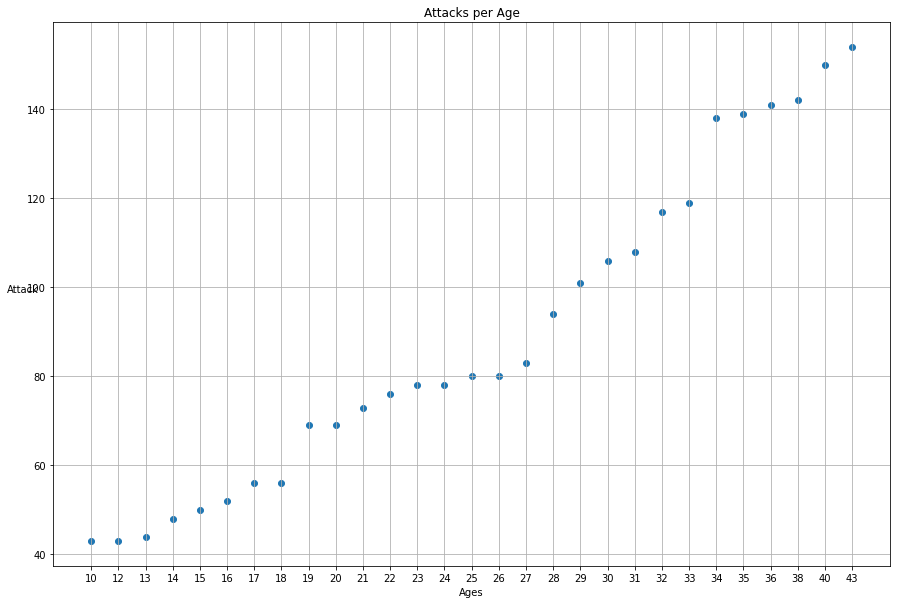

In [ ]:
#Q2 - plot
x = df2_question2.index.sort_values(ascending=True)
y = df2_question2.loc[:, 'Attack_per_Age'].sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x, y)

plt.title('Attacks per Age')
plt.xlabel('Ages')
plt.ylabel('Attack', rotation=0)
plt.grid() 

plt.show()

#plot is nog okay, not the right Attack/Ages - sorting problem?

In [ ]:
#QUESTION 3 - ARE SHARKS ATTACKS WHERE SHARKS WERE PROVOKED MORE OF LESS DANGEROUS?

#goal: to make a barchart with these 4 values in it. #plot.bar(stacked=True)?

#start to make a df with the columns Attack_Type and Fatal!
df5 = df3.loc[:, ['Attack_Type','Fatal']]

df6 = df5.dropna(how='all') #doesnot work???


In [ ]:
#Q3 - selecting the rows with Unprovoked/Provoked en Y/N in the columns Attack_Type and Fatal

df_q3_Attack_Type = df5.loc[df5.Attack_Type.str.contains('Unprovoked|Provoked')]
df_q3_Attack_Type.sample(5)


In [ ]:
#Q3 - counting Unprovoked/Provoked and Fatal Y/N
df_q3_Attack_Type.value_counts()
#results:

Attack_Type  Fatal  
Unprovoked   N          3351
             Y          1181
Provoked     N           549
Unprovoked   UNKNOWN      57
Provoked     Y            19
             UNKNOWN       3
dtype: int64

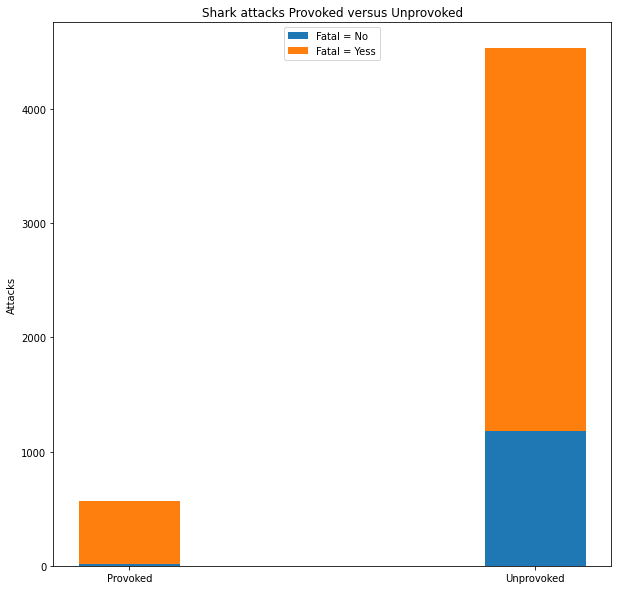

Q3 Answer: Provoked Shark attacks are less dangerous then the Unprovoked!


In [ ]:
#Q3 - Plot
#todo: finetuning after getting the correct numbers!!!
#example via matplotlib.org website bar_stacked
import matplotlib.pyplot as plt

labels = ['Provoked', 'Unprovoked']
fatal_y = [19, 1181]
fatal_n = [549, 3351]
#fatal = [0, 3]
#not_fatal = [3, 5]
width = 0.25       

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(labels, fatal_y, width, label='Fatal = No')
ax.bar(labels, fatal_n, width, bottom=fatal_y,
       label='Fatal = Yess')

ax.set_ylabel('Attacks')
ax.set_title('Shark attacks Provoked versus Unprovoked')
ax.legend(loc='upper center')

plt.show()


#hmmmm, not satisfied with the result, should I make percentage of the attack numbers?

print('Q3 Answer: Provoked Shark attacks are less dangerous then the Unprovoked!')

In [ ]:
#QUESTION 4: Are certain activities more likely to result in a shark attack?
#quick answer: Certain activities are certainn more likely to result in a shark attack!
#Surfing, Swimming and Fishing are not recommanded ;-)

#but of course we won't to make the answer visual in a plot... 

#df3.loc['Activity'].value_counts().head(10)

df_q4 = df3.loc[:, ['Activity']].value_counts().head(15)
df_q4_2 = df_q4.to_frame() # make a df of it
df_q4_2.head(15)

In [ ]:
#Q4
#indexering aanpassen?
#kolomnaam 0 aanpassen
df_q4_2.rename(columns={'0': 'Attack_Numbers'}, inplace=True) #does'nt work out :-(
df_q4_2.head(15)

,0
Activity,
Unknown,19968
Surfing,971
Swimming,916
Fishing,431
Spearfishing,333
Bathing,162
Wading,149
Diving,127
Standing,99


In [ ]:
#Q4 - plot
#plotting won't fit either...
fig, ax = plt.subplots()

x = df_q4_2.index
y = df_q4_2.loc[df_q4_2['0']

ax.bar(x, y)
plt.title('Activities that lead more likely to shark attacks')
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.show()

SyntaxError: ignored

In [ ]:
#24052022 Kind of vastgelopen, besloten deze eerste versie van de Shark opdracht in te leveren en met de Winc feedback de opdracht verder te finetunen.